# Importing Dependices

In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3588, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 3588 (delta 94), reused 199 (delta 87), pack-reused 3378
Receiving objects: 100% (3588/3588), 647.36 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (2050/2050), done.
Updating files: 100% (243/243), done.


In [4]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [5]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 24.7 MB/s eta 0:00:00


# Get Data

In [7]:
# kaggle datasets download -d mittalshubham/images256

In [8]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [9]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

# Create Dataset and DataLoaders

In [10]:
# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [11]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7fa8eb778040>,
 ['pizza', 'steak', 'sushi'])

In [12]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[2], label_batch[2]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(2))

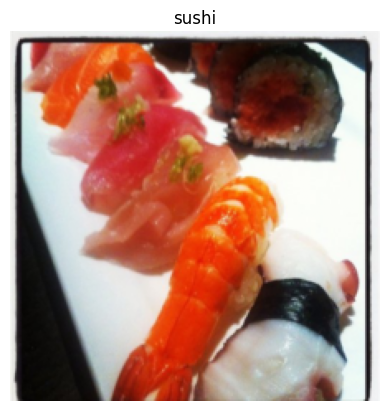

In [13]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

# Equation 1: Split Data into Patches

## Plotting the Patches

In [14]:
HEIGHT=224
WIDTH=224
COLOR_CHANNELS=3
PATCH_SIZE=16

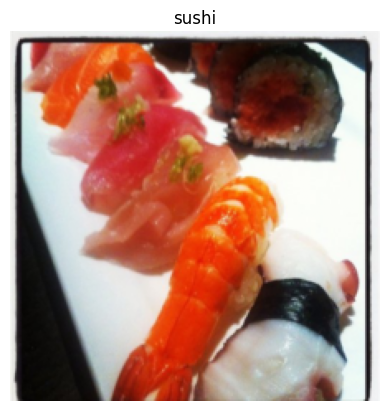

In [15]:
# View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False);

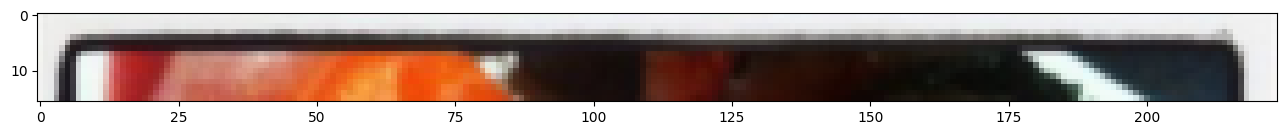

In [16]:
# Change image shape to be compatible with matplotlib (color_channels, height, width) -> (height, width, color_channels) 
image_permuted = image.permute(1, 2, 0)
# Index to plot the top row of patched pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);

In [17]:
img_size=224
num_patches=img_size//patch_size
num_patches

14

In [18]:
# fig,axs=plt.subplots(nrows=num_patches,
#                     ncols=num_patches,
#                     sharex=True,
#                     sharey=True)
# for i ,patch_height in enumerate(range(0,img_size,patch_size)):
#   for j,patch_width in enumerate(range(0,img_size,patch_size)):
#     axs[i][j].imshow(image_permuted[patch_height:patch_height+patch_size,patch_width:patch_width+patch_size+patch_size,:]);
#     axs[i, j].set_ylabel(i+1, 
#                              rotation="horizontal", 
#                              horizontalalignment="right", 
#                              verticalalignment="center") 
#     axs[i][j].set_xlabel(j+1)
#     axs[i][j].set_xticks([])
#     axs[i][j].set_yticks([])
#     axs[i, j].label_outer()

## Creating Partches with Conv Layer

In [19]:
conv2d=nn.Conv2d(in_channels=3,
                 out_channels=768,
                 kernel_size=PATCH_SIZE,
                 stride=PATCH_SIZE,
                 padding=0)

In [20]:
img_out=conv2d(image.unsqueeze(0))
print(img_out.shape)

torch.Size([1, 768, 14, 14])


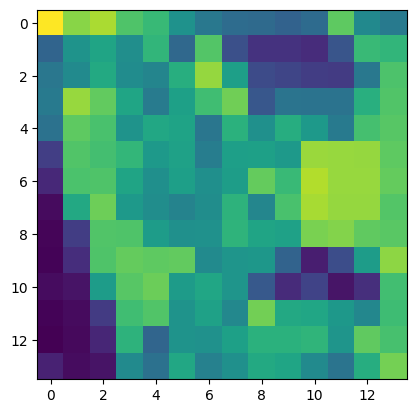

In [21]:
for i in range(0,768):
  plt.imshow(img_out[:,i,:,:].squeeze().detach().numpy())

## Flattening the Patches

In [22]:
flatten_layer=nn.Flatten(start_dim=2,end_dim=3)

In [23]:
flatten_layer(img_out).shape

torch.Size([1, 768, 196])

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


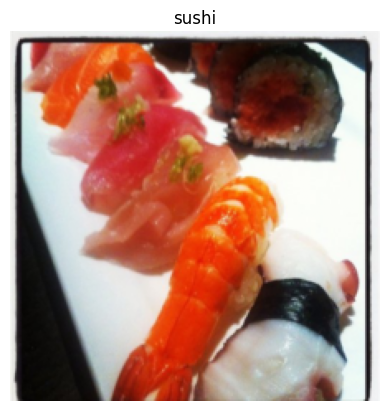

In [24]:
# 1. View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False);
print(f"Original image shape: {image.shape}")

# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape: {image_out_of_conv.shape}")

# 3. Flatten the feature maps
image_out_of_conv_flattened = flatten_layer(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")

In [25]:
class PatchEmbedding(nn.Module):
  def __init__(self,
               in_channels:int=3,
               patch_size:int=16,
               embedding_dim:int=768):
    super().__init__()
    self.patch_size=patch_size
    self.Patcher=nn.Conv2d(in_channels=in_channels,
                           out_channels=embedding_dim,
                           kernel_size=patch_size,
                           stride=patch_size,
                           padding=0)
    self.Flatter=nn.Flatten(start_dim=2,end_dim=3)
  def forward(self,x):
    image_resolution = x.shape[-1]
    assert image_resolution % self.patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"
    x_patched = self.Patcher(x)
    x_flattened = self.Flatter(x_patched) 
    return x_flattened.permute(0,2,1)

In [26]:
# set_seeds()

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)

# Pass a single image through
print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


In [27]:
# batch_size = patch_embedded_image.shape[0]
# embedding_dimension = patch_embedded_image.shape[-1]

## Creating the Class Token

In [28]:
rand_img_tensor=torch.randn(1,3,224,224)

In [29]:
# print(rand_img_tensor)

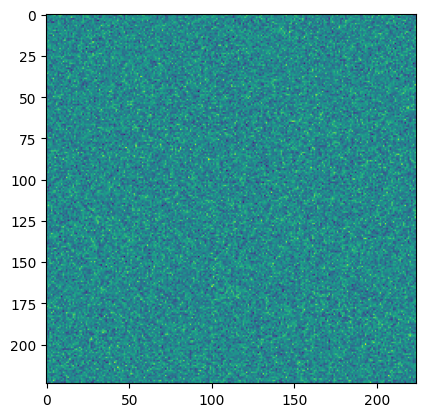

In [30]:
plt.imshow(rand_img_tensor[0][0])

In [31]:
output_patchs=patchify(rand_img_tensor[0].unsqueeze(0))

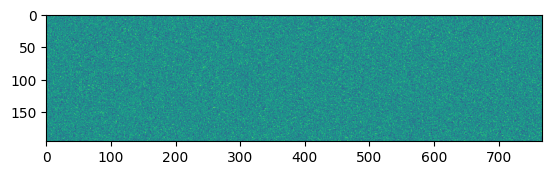

In [32]:
plt.imshow(output_patchs[0].detach().numpy())

In [33]:
# Get the batch size and embedding dimension
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

In [34]:
print(batch_size)
print(embedding_dimension)

1
768


In [35]:
class_token=nn.Parameter(torch.ones(batch_size,1,embedding_dimension,requires_grad=True))

In [36]:
class_token

Parameter containing:
tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 

In [37]:
class_token.shape

torch.Size([1, 1, 768])

In [38]:
output_patchs.shape

torch.Size([1, 196, 768])

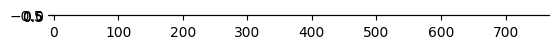

In [39]:
plt.imshow(class_token[0].detach().numpy())

In [40]:
# Add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token, output_patchs), 
                                                      dim=1) # concat on first dimension

# Print the sequence of patch embeddings with the prepended class token embedding
print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.6301, -0.9917, -0.0972,  ...,  0.1323, -0.3213, -0.2962],
         [ 0.0035, -0.2605, -0.2002,  ..., -0.1716, -0.3747, -0.0924],
         ...,
         [ 0.4011, -0.8327,  0.5752,  ...,  0.1137, -0.8625, -0.1277],
         [ 0.0427, -0.0300,  0.1352,  ...,  0.1024,  0.2188, -0.0773],
         [-0.4168,  0.8372, -0.1519,  ..., -0.1570,  0.4741, -0.2493]]],
       grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


## Creating a Positional Embedding

In [41]:
# View the sequence of patch embeddings with the prepended class embedding
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [-0.6301, -0.9917, -0.0972,  ...,  0.1323, -0.3213, -0.2962],
          [ 0.0035, -0.2605, -0.2002,  ..., -0.1716, -0.3747, -0.0924],
          ...,
          [ 0.4011, -0.8327,  0.5752,  ...,  0.1137, -0.8625, -0.1277],
          [ 0.0427, -0.0300,  0.1352,  ...,  0.1024,  0.2188, -0.0773],
          [-0.4168,  0.8372, -0.1519,  ..., -0.1570,  0.4741, -0.2493]]],
        grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

In [42]:
# Calculate N (number of patches)
number_of_patches = int((HEIGHT * WIDTH) / patch_size**2)
print(number_of_patches)

196


In [43]:
# Get embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[2]
print(embedding_dimension)

768


In [44]:
position_embedding=nn.Parameter(
    torch.ones(1,number_of_patches+1,embedding_dimension),
    requires_grad=True
)

In [45]:
position_embedding,position_embedding.shape

(Parameter containing:
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True),
 torch.Size([1, 197, 768]))

In [46]:
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(patch_and_position_embedding)
print(f"Patch embeddings, class token prepended and positional embeddings added shape: {patch_and_position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.3699, 0.0083, 0.9028,  ..., 1.1323, 0.6787, 0.7038],
         [1.0035, 0.7395, 0.7998,  ..., 0.8284, 0.6253, 0.9076],
         ...,
         [1.4011, 0.1673, 1.5752,  ..., 1.1137, 0.1375, 0.8723],
         [1.0427, 0.9700, 1.1352,  ..., 1.1024, 1.2188, 0.9227],
         [0.5832, 1.8372, 0.8481,  ..., 0.8430, 1.4741, 0.7507]]],
       grad_fn=<AddBackward0>)
Patch embeddings, class token prepended and positional embeddings added shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


## Putting Equation 1 Together

In [47]:
# Set the Patch Size
patch_size=16
# Print shape of original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]
# Get image tensor and add batch dimension
x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")
# Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)
# Pass the Image throuch Patch Embedding Layer
patched_image=patch_embedding_layer(x)
print(f"Patching embedding shape: {patched_image.shape}")
# Creating the Class Token
batch_size = patched_image.shape[0]
embedding_dimension = patched_image.shape[-1]
class_token=nn.Parameter(torch.ones(batch_size,1,embedding_dimension),
                         requires_grad=True)
print(f"Class token embedding shape: {class_token.shape}")
# Prepend class token embedding to patch embedding
patched_image_with_class_token=torch.cat((class_token, patched_image), dim=1)
print(f"Patch embedding with class token shape: {patched_image_with_class_token.shape}")
# Create Positional Embeddings
number_of_patches = int((height * width) / patch_size**2)
positional_embedding=nn.Parameter(torch.ones(1,number_of_patches+1,embedding_dimension),
                                  requires_grad=True)
# Add Positonal Embedding to Patched Image
patch_and_position_embedding = patched_image_with_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


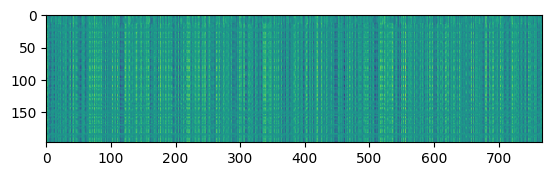

In [48]:
plt.imshow(patch_and_position_embedding[0].detach().numpy())

# Equation 2 : Multi Head Self-Attention

In [49]:
class MultiHeadSelfAttentionBlock(nn.Module):
  def __init__(self,
               embedding_dim=768,
               num_heads=12,# Heads from table1
               attn_dropout=0):
    super().__init__()
    self.layer_norm=nn.LayerNorm(normalized_shape=embedding_dim)
    self.multihead_attn=nn.MultiheadAttention(embed_dim=embedding_dimension,num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True)
  def forward(self,x):
    x=self.layer_norm(x)
    attn_output,_=self.multihead_attn(query=x,
                                    key=x,
                                    value=x,
                                    need_weights=False)
    return attn_output

In [50]:
msa_block=MultiHeadSelfAttentionBlock(embedding_dim=768,num_heads=12)

In [51]:
patched_image_through_msa_block = msa_block(patch_and_position_embedding)

In [52]:
print(patched_image_through_msa_block)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape MSA block: {patched_image_through_msa_block.shape}")

tensor([[[ 0.4383, -0.1718,  0.1095,  ...,  0.0411,  0.5596, -0.0300],
         [ 0.4185, -0.1808,  0.1265,  ...,  0.0794,  0.5568, -0.0338],
         [ 0.4220, -0.1928,  0.1179,  ...,  0.0781,  0.5561, -0.0315],
         ...,
         [ 0.4192, -0.1707,  0.1327,  ...,  0.0773,  0.5650, -0.0432],
         [ 0.4211, -0.1869,  0.1084,  ...,  0.0779,  0.5715, -0.0357],
         [ 0.4090, -0.1614,  0.1223,  ...,  0.0864,  0.5771, -0.0423]]],
       grad_fn=<TransposeBackward0>)
Input shape of MSA block: torch.Size([1, 197, 768])
Output shape MSA block: torch.Size([1, 197, 768])


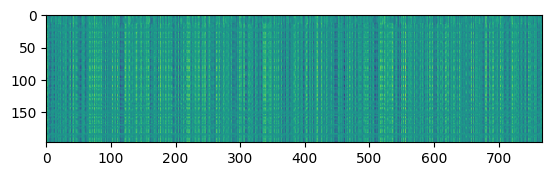

In [53]:
plt.imshow(patch_and_position_embedding[0].detach().numpy())

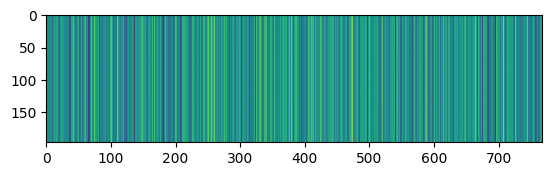

In [54]:
plt.imshow(patched_image_through_msa_block[0].detach().numpy())

# Equation 3: Multilayer Perceptron

In [55]:
class MLPBlock(nn.Module):
  def __init__(self,
                embedding_dim:int=768, # Hidden Size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 dropout:float=0.1):
    super().__init__()
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)
    self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(), # "The MLP contains two layers with a GELU non-linearity (section 3.1)."
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, # needs to take same in_features as out_features of layer above
                      out_features=embedding_dim), # take back to embedding_dim
            nn.Dropout(p=dropout) # "Dropout, when used, is applied after every dense layer.."
        )
  def forward(self,x):
    x = self.layer_norm(x)
    x = self.mlp(x)
    return x

In [56]:
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768, # from Table 1 
                     mlp_size=3072, # from Table 1
                     dropout=0.1) # from Table 3

In [57]:
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"Input shape of MLP block: {patched_image_through_mlp_block.shape}")
print(f"Output shape MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape MLP block: torch.Size([1, 197, 768])


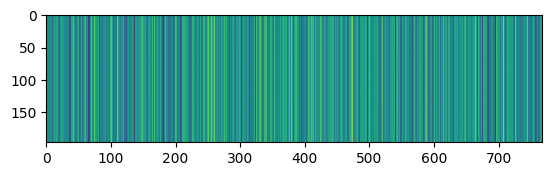

In [58]:
plt.imshow(patched_image_through_msa_block[0].detach().numpy())

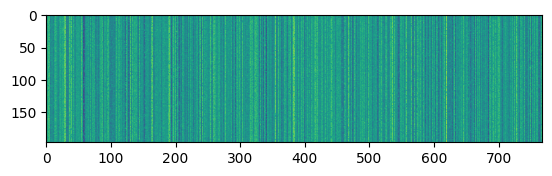

In [59]:
plt.imshow(patched_image_through_mlp_block[0].detach().numpy())

# Creating the Transformer Encoder

In [60]:
class TransformerEncoderBlock(nn.Module):
  def __init__(
      self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 mlp_dropout:float=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                 attn_dropout:float=0):
    super().__init__()
    self.msa_block=MultiHeadSelfAttentionBlock(
        embedding_dim=embedding_dim,
        num_heads=num_heads,
        attn_dropout=attn_dropout
    )
    self.mlp_block=MLPBlock(
        embedding_dim=embedding_dim,
        mlp_size=mlp_size,
        dropout=mlp_dropout
    )
  def forward(self,x):
    x =  self.msa_block(x) + x
    x =  self.mlp_block(x) + x
    return x

In [61]:
transformer_encoder=TransformerEncoderBlock()

In [62]:
from torchinfo import summary

In [63]:
summary(model=transformer_encoder,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

# Building ViT

In [64]:
class ViT(nn.Module):
  def __init__(
      self,
      image_size:int=224,
      in_channels:int=3,
      patch_size:int=16,
      num_transformer_layers:int=12,
      embedding_dim:int=768,
      mlp_size:int=3072,
      n_heads:int=12,
      attn_dropout:int=0,
      mlp_dropout:int=0.1,
      embedding_dropout:int=0.1,
      num_classes:int=3):
    super().__init__()
    assert image_size % patch_size==0,f"wrong patch size"
    # Calculate the number of patches
    self.num_patches=(image_size*image_size)//patch_size**2
    # Create Learnible Class EMbedding
    self.class_embedding=nn.Parameter(data=torch.randn(1,1,embedding_dim),
                                  requires_grad=True)
    # Create the Positional Embedding
    self.position_embedding=nn.Parameter(data=torch.randn(1,self.num_patches+1,embedding_dim),
                                         requires_grad=True)
    # Creating the Embedding Dropout
    self.embedding_dropout=nn.Dropout(p=embedding_dropout)
    # Creating Patch Embedding Layer
    self.patch_embedding=PatchEmbedding(in_channels=in_channels,
                                        patch_size=patch_size,
                                        embedding_dim=embedding_dim)
    # Creating the Transformer Encoder
    self.transformer_encoder=nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                   mlp_size=mlp_size,
                                                                   mlp_dropout=mlp_dropout,
                                                                   num_heads=n_heads) for _ in range(num_transformer_layers)])
    # Creating MLP Head (Equation 4)
    self.classifier=nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
                  out_features=num_classes)
    )
  def forward(self,x):
      # Get the Batch Size
      batch_size=x.shape[0]
      # Create a Class Token
      class_token=self.class_embedding.expand(batch_size,-1,-1)
      # Create a Patch Image
      x=self.patch_embedding(x)
      # combining the Patched Image and Class Token
      x=torch.cat((class_token,x),dim=1)
      # Adding a Positional Embedding
      x=self.position_embedding+x
      # Applying Dropout to Patch Embeddings
      x=self.embedding_dropout(x)
      # Passing the Input to Encoder
      x=self.transformer_encoder(x)
      # Classifying the Output
      x=self.classifier(x[:,0])

      return x

In [65]:
vit=ViT()

In [66]:
random_image_tensor = torch.randn(1, 3, 224, 224)

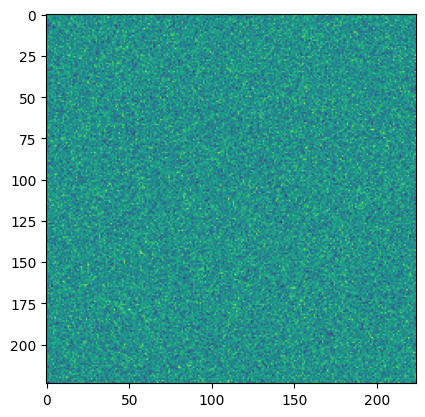

In [67]:
plt.imshow(random_image_tensor[0][0].detach().numpy())

In [68]:
vit = ViT(num_classes=len(class_names))

In [69]:
vit(random_image_tensor)

tensor([[ 0.0513,  0.1743, -0.1693]], grad_fn=<AddmmBackward0>)

In [70]:
from torchinfo import summary
summary(
      model=ViT(num_classes=1000), 
      input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
      col_names=["input_size", "output_size", "num_params", "trainable"],
      col_width=20,
      row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 1000]           152,064              True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    └─Conv2d (Patcher)                                      [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (Flatter)                                     [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (embedding_dropout)                                [32, 197, 768]       [32, 197, 768]       --                   --
├─Sequential (transformer_encoder)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    └─TransformerEncoderBlock (0)                           [32, 197, 768]       [32, 197, 768]

# Training the Model

In [71]:
optimizer=torch.optim.Adam(
    vit.parameters(),
    lr=1e-3,
    betas=(0.9,0.999),
    weight_decay=0.1
)

In [72]:
loss_fn=torch.nn.CrossEntropyLoss()

In [73]:
from going_modular.going_modular import engine

In [74]:
EPOCHS=10

In [75]:
results=engine.train(model=vit,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=EPOCHS,
                     device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.7156 | train_acc: 0.2969 | test_loss: 1.1634 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.2738 | train_acc: 0.2617 | test_loss: 1.1378 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.5627 | train_acc: 0.2969 | test_loss: 1.2555 | test_acc: 0.5417
Epoch: 4 | train_loss: 1.4465 | train_acc: 0.3984 | test_loss: 1.4875 | test_acc: 0.5417
Epoch: 5 | train_loss: 1.5638 | train_acc: 0.3047 | test_loss: 1.1768 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.2406 | train_acc: 0.2695 | test_loss: 1.0070 | test_acc: 0.5417
Epoch: 7 | train_loss: 1.1982 | train_acc: 0.2734 | test_loss: 1.2389 | test_acc: 0.2604
Epoch: 8 | train_loss: 1.1741 | train_acc: 0.3359 | test_loss: 1.6065 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.1174 | train_acc: 0.4531 | test_loss: 2.1511 | test_acc: 0.2604
Epoch: 10 | train_loss: 1.3046 | train_acc: 0.2891 | test_loss: 2.6521 | test_acc: 0.1979


In [76]:
from helper_functions import plot_loss_curves

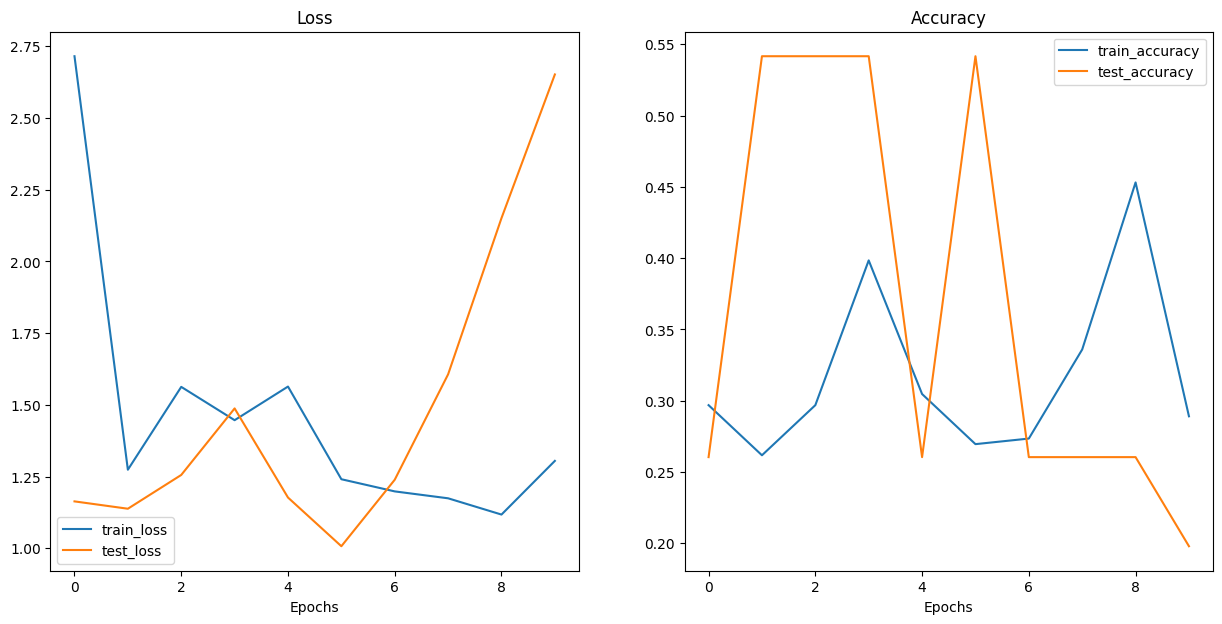

In [77]:
plot_loss_curves(results)

In [78]:
results

{'train_loss': [2.715618282556534,
  1.2737818956375122,
  1.5626720488071442,
  1.4464964792132378,
  1.5637609958648682,
  1.2406354248523712,
  1.1982107013463974,
  1.1741183400154114,
  1.1174139752984047,
  1.3045935928821564],
 'train_acc': [0.296875,
  0.26171875,
  0.296875,
  0.3984375,
  0.3046875,
  0.26953125,
  0.2734375,
  0.3359375,
  0.453125,
  0.2890625],
 'test_loss': [1.1633824904759724,
  1.137771060069402,
  1.255541796485583,
  1.4875259300072987,
  1.1768105228741963,
  1.00703360637029,
  1.2388736208279927,
  1.606459418932597,
  2.1510796546936035,
  2.6520562966664634],
 'test_acc': [0.2604166666666667,
  0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.2604166666666667,
  0.5416666666666666,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.19791666666666666]}

# Using PreTrained ViT Model

In [79]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

In [80]:
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 89.3MB/s]


In [81]:
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

In [82]:
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [83]:
pretrained_vit 

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [84]:
summary(model=pretrained_vit, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [85]:
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [86]:
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32)

In [87]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), 
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8047 | train_acc: 0.6992 | test_loss: 0.5470 | test_acc: 0.8277
Epoch: 2 | train_loss: 0.3665 | train_acc: 0.9492 | test_loss: 0.3429 | test_acc: 0.8778
Epoch: 3 | train_loss: 0.2098 | train_acc: 0.9648 | test_loss: 0.2726 | test_acc: 0.8778
Epoch: 4 | train_loss: 0.1579 | train_acc: 0.9688 | test_loss: 0.2366 | test_acc: 0.8977
Epoch: 5 | train_loss: 0.1279 | train_acc: 0.9727 | test_loss: 0.2245 | test_acc: 0.8977
Epoch: 6 | train_loss: 0.1465 | train_acc: 0.9727 | test_loss: 0.2156 | test_acc: 0.8977
Epoch: 7 | train_loss: 0.0981 | train_acc: 0.9766 | test_loss: 0.2598 | test_acc: 0.8987
Epoch: 8 | train_loss: 0.0867 | train_acc: 0.9844 | test_loss: 0.2498 | test_acc: 0.8883
Epoch: 9 | train_loss: 0.1158 | train_acc: 0.9883 | test_loss: 0.2173 | test_acc: 0.8778
Epoch: 10 | train_loss: 0.0685 | train_acc: 0.9844 | test_loss: 0.1805 | test_acc: 0.9176


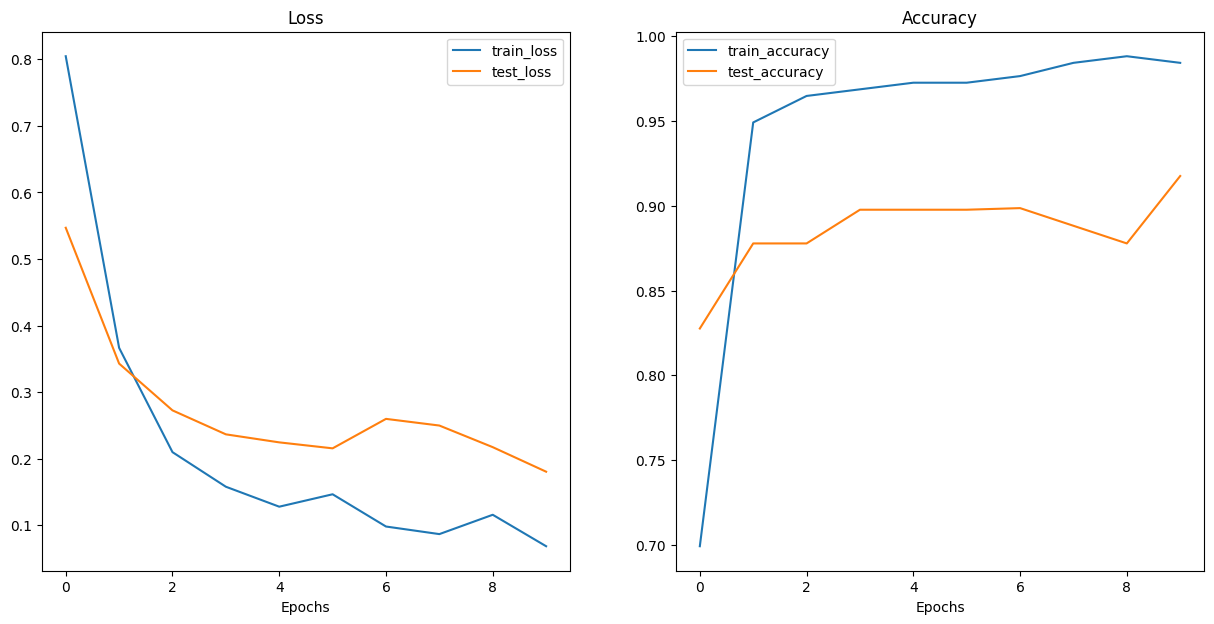

In [88]:
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

In [89]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=pretrained_vit,
                 target_dir="models",
                 model_name="08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth")

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


In [90]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB
